# Data Loading

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/kaggle/input/loan-approval/loan_approval.csv')
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


Here by name of the column ***points***  we can't understand what it shows so we see correlation of points and loan_approval in step of data inspecting wo we can understand should we drop it or keep it.

# Data Inspecting

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [4]:
df.describe()

,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


In [5]:
df.isnull().sum()

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.nunique()

name              2000
city              1882
income            1988
credit_score       537
loan_amount       1968
years_employed      41
points              19
loan_approved        2
dtype: int64

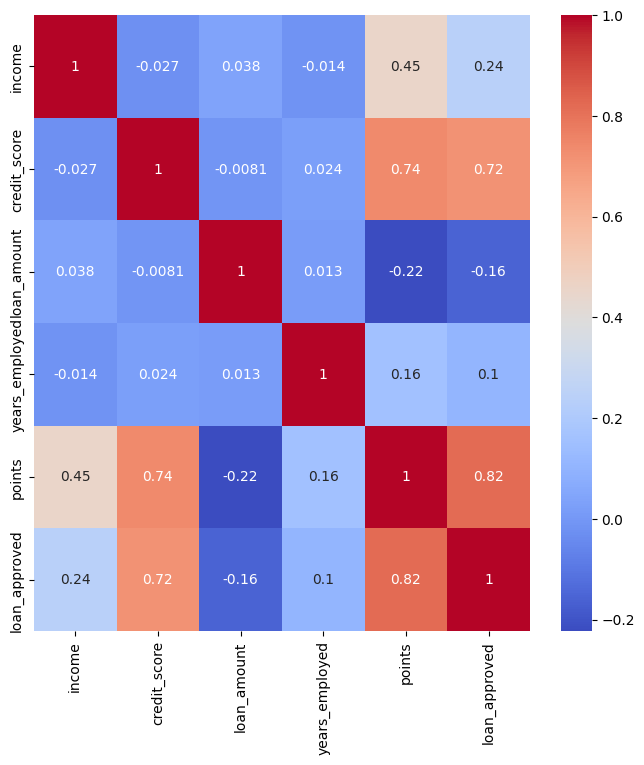

In [8]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap = 'coolwarm', annot=True)
plt.show()

* correlation shows that value 0.82 between points and loan_approved that means there is strong rellation between them.

# Data cleaning
* Drop irrelevent identifiers
* Handling missing values
* Feature encoding

In [9]:
df = df.drop(['name','city','points'], axis=1)
df.head()

,income,credit_score,loan_amount,years_employed,loan_approved
0,113810,389,39698,27,False
1,44592,729,15446,28,False
2,33278,584,11189,13,False
3,127196,344,48823,29,False
4,66048,496,47174,4,False


# Checking for outliears

by IQR method

In [10]:
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['income'] < lower_bound) | (df['income'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [income, credit_score, loan_amount, years_employed, loan_approved]
Index: []


By z_score method

In [11]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[['income','loan_amount','credit_score']]))
outliers = df[(z_scores > 3).any(axis=1)]
print(outliers)

Empty DataFrame
Columns: [income, credit_score, loan_amount, years_employed, loan_approved]
Index: []


BY visual method

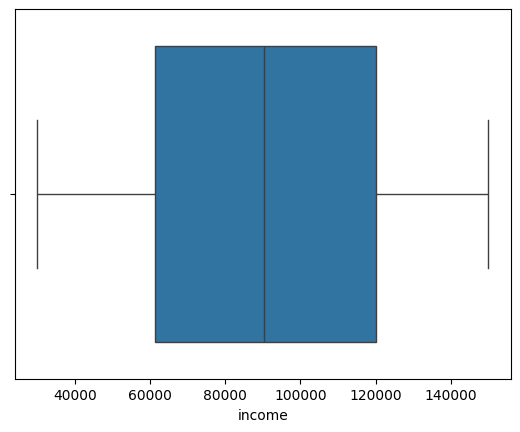

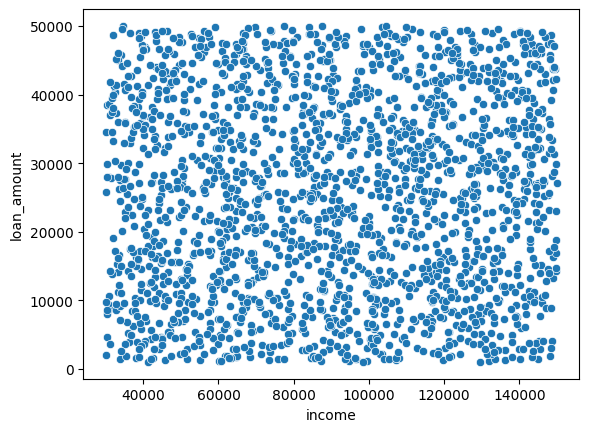

In [12]:
sns.boxplot(x=df['income'])
plt.show()

sns.scatterplot(x='income', y='loan_amount', data=df)
plt.show()

# Feature Engineering

In [13]:
df['loan_approved'] = df['loan_approved'].astype(int)

In [14]:
df.head()

,income,credit_score,loan_amount,years_employed,loan_approved
0,113810,389,39698,27,0
1,44592,729,15446,28,0
2,33278,584,11189,13,0
3,127196,344,48823,29,0
4,66048,496,47174,4,0


In [15]:
x = df.drop(['loan_approved'], axis=1)
y = df['loan_approved']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
print("Train Accuracy:", model.score(x_train, y_train))
print("Test Accuracy:", model.score(x_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.975


In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.978


In [19]:
model = RandomForestClassifier(n_estimators=50,max_depth=5,class_weight='balanced',random_state=42)

In [20]:
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                       random_state=42)

In [21]:
y_pred = model.predict(x_test)

In [22]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       217
           1       0.92      0.97      0.95       183

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



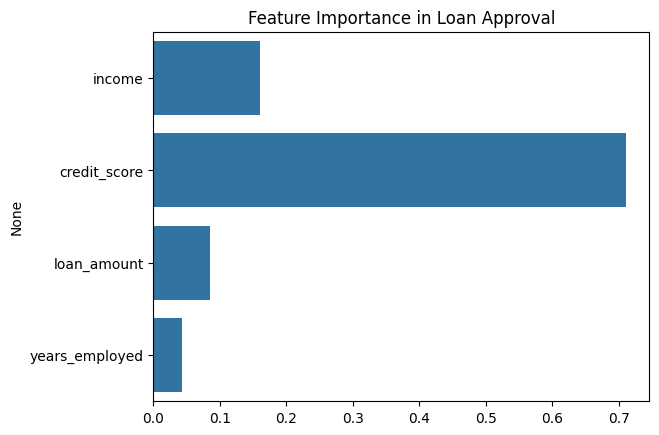

In [23]:
feature_importances = model.feature_importances_
features = x.columns

sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Loan Approval")
plt.show()

In [24]:
import matplotlib
import sklearn

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("scikit-learn:", sklearn.__version__)


pandas: 2.2.2
numpy: 2.0.2
matplotlib: 3.10.0
seaborn: 0.13.2
scikit-learn: 1.6.1


In [25]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)